# CDiscount Kaggle

## 1. Test with provided kernel

In [1]:
import sys
from pyspark import SparkContext
from pyspark.sql import SparkSession

In [2]:
import numpy as np
import pandas as pd

In [28]:
import io
import bson                       # this is installed with the pymongo package
import matplotlib.pyplot as plt
from skimage.data import imread   # or, whatever image library you prefer
import multiprocessing as mp 

In [29]:
data = bson.decode_file_iter(open('input/train_example.bson', 'rb'))

In [30]:
prod_to_category = dict()
prod_to_imgs = dict()

In [31]:
for c, d in enumerate(data):
    product_id = d['_id']
    category_id = d['category_id']
    
    img_list = []
    for e, pic in enumerate(d['imgs']):
        picture = imread(io.BytesIO(pic['picture']))
        img_list.append(picture)
     
    prod_to_category[product_id] = category_id   
    prod_to_imgs[product_id] = img_list
    
        
df_cat = pd.DataFrame.from_dict(prod_to_category, orient='index')
df_img = pd.DataFrame.from_dict(prod_to_imgs, orient='index')

df_cat.index.name = '_id'
df_img.index.name = '_id'

df_cat.rename(columns={0: 'category_id'}, inplace=True)
df_img.rename(columns={0: 'imgs'}, inplace=True)

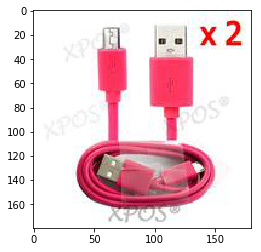

In [32]:
plt.imshow(prod_to_imgs[84][0]);
plt.show()

In [44]:
prod_to_category[84]

1000010641